In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import sys
sys.path.append('../../')
from data.api_calls import import_hypercell_raw

Read data from 8-9pm for the range 15.07.19-15.09.19 from files on the computer:

In [2]:
# start = datetime.datetime(year = 2019, month=7, day=15, hour = 20, minute=0)
# end = datetime.datetime(year = 2019, month=7, day=15, hour = 21, minute=0)
# start = start + timedelta(days=54)
# end = end + timedelta(days=54)
dfs = []
for i in range(63):
    data = pd.read_pickle("raw_hypercell_0-1_" + str(i))
    # Increase by one day:
    # start = start + timedelta(days=1)
    # end = end + timedelta(days=1)
    # Save raw data:
#     filename = "raw_hypercell_20-21_" + str(i)
#     data.to_pickle(filename)
    # Aggregate:
    data.drop_duplicates(subset = ["hash", "serial"], inplace=True)
    agg_data = data.groupby(by = ["serial"]).count()
    agg_data = agg_data.transpose()
    agg_data.reset_index(inplace=True, drop = True)
    agg_data = agg_data.loc[0]
    dfs.append(agg_data)
df = pd.concat(dfs, axis=1, sort=True).T
df = df.reset_index(drop = True)

KeyboardInterrupt: 

Here we have a dataframe with stations as columns, and each row has values, for the hour 20-21 for a given day, of the count of unique hashes for that station on that day.
Note that it's missing some stations, probably the bluetooth devices there didn't work.

In [2]:
df = pd.read_csv('counts_h14-15.csv')

In [3]:
df

,Unnamed: 0,0000000006dd41f6,000000000f4919c9,0000000019fb59c4,00000000342570c2,0000000038bf9618,0000000038d83d41,000000004ef3150d,0000000053c6c2be,00000000675d5200,...,0000000096918cfa,00000000a53ed894,00000000aa852af1,00000000afef4555,00000000d747f075,00000000e8a064a4,00000000f1124bca,00000000fb7600be,00000000fdda10fe,00000000fffb8cf0
0,0,464.0,793,376.0,440.0,627.0,944.0,NaN,865,NaN,...,NaN,326,1501.0,2620.0,701,134.0,91.0,832.0,839.0,581.0
1,0,1308.0,797,92.0,483.0,NaN,779.0,53.0,684,168.0,...,120.0,2631,1243.0,2273.0,670,129.0,79.0,722.0,NaN,351.0
2,0,491.0,1172,NaN,452.0,392.0,1044.0,NaN,480,150.0,...,117.0,520,2146.0,NaN,515,NaN,74.0,NaN,NaN,NaN
3,0,1440.0,828,324.0,428.0,NaN,1035.0,57.0,868,108.0,...,100.0,1421,1394.0,2273.0,989,172.0,99.0,907.0,689.0,428.0
4,0,249.0,1165,188.0,464.0,417.0,832.0,NaN,448,148.0,...,NaN,160,1576.0,2643.0,282,226.0,107.0,771.0,1483.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,222.0,1064,241.0,485.0,405.0,964.0,NaN,619,203.0,...,NaN,154,1657.0,2896.0,451,146.0,107.0,959.0,1365.0,359.0
59,0,434.0,630,76.0,402.0,507.0,776.0,68.0,838,27.0,...,143.0,642,1165.0,1790.0,808,34.0,117.0,920.0,531.0,347.0
60,0,716.0,904,154.0,451.0,276.0,803.0,NaN,418,236.0,...,NaN,1216,1286.0,2375.0,314,89.0,89.0,583.0,1343.0,265.0
61,0,200.0,647,183.0,442.0,682.0,832.0,NaN,725,28.0,...,NaN,271,886.0,1652.0,464,89.0,90.0,790.0,707.0,346.0


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

,0000000006dd41f6,000000000f4919c9,0000000019fb59c4,00000000342570c2,0000000038bf9618,0000000038d83d41,000000004ef3150d,0000000053c6c2be,00000000675d5200,000000006b087f40,...,0000000096918cfa,00000000a53ed894,00000000aa852af1,00000000afef4555,00000000d747f075,00000000e8a064a4,00000000f1124bca,00000000fb7600be,00000000fdda10fe,00000000fffb8cf0
0,464.0,793,376.0,440.0,627.0,944.0,NaN,865,NaN,1891.0,...,NaN,326,1501.0,2620.0,701,134.0,91.0,832.0,839.0,581.0
1,1308.0,797,92.0,483.0,NaN,779.0,53.0,684,168.0,2177.0,...,120.0,2631,1243.0,2273.0,670,129.0,79.0,722.0,NaN,351.0
2,491.0,1172,NaN,452.0,392.0,1044.0,NaN,480,150.0,3060.0,...,117.0,520,2146.0,NaN,515,NaN,74.0,NaN,NaN,NaN
3,1440.0,828,324.0,428.0,NaN,1035.0,57.0,868,108.0,2229.0,...,100.0,1421,1394.0,2273.0,989,172.0,99.0,907.0,689.0,428.0
4,249.0,1165,188.0,464.0,417.0,832.0,NaN,448,148.0,2808.0,...,NaN,160,1576.0,2643.0,282,226.0,107.0,771.0,1483.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,222.0,1064,241.0,485.0,405.0,964.0,NaN,619,203.0,2765.0,...,NaN,154,1657.0,2896.0,451,146.0,107.0,959.0,1365.0,359.0
59,434.0,630,76.0,402.0,507.0,776.0,68.0,838,27.0,1546.0,...,143.0,642,1165.0,1790.0,808,34.0,117.0,920.0,531.0,347.0
60,716.0,904,154.0,451.0,276.0,803.0,NaN,418,236.0,2952.0,...,NaN,1216,1286.0,2375.0,314,89.0,89.0,583.0,1343.0,265.0
61,200.0,647,183.0,442.0,682.0,832.0,NaN,725,28.0,1693.0,...,NaN,271,886.0,1652.0,464,89.0,90.0,790.0,707.0,346.0


Also we see, that some of the stations have consecutive missing values. We assume that the device was broken there. Due to our implementation, 0 counts on functioning devices will also lead to a missing value.
Due to the way correlations are calculated, we can sensibly replace NaNs with the mean of the column without changing the result.

If there are individual NaNs instead of consecutive ones, we assume there were simply no people there and replace them with 0s.

If more than half the values are missing, we assume that the mean of that column is not good enough (is based on too little data), and we discard the data of these stations.

So eventually we are missing data for a couple of stations, where we conclude that we can't calculate correlations with those stations. They're just not part of the correlation matrix.

In [5]:
df.describe()

,0000000006dd41f6,000000000f4919c9,0000000019fb59c4,00000000342570c2,0000000038bf9618,0000000038d83d41,000000004ef3150d,0000000053c6c2be,00000000675d5200,000000006b087f40,...,0000000096918cfa,00000000a53ed894,00000000aa852af1,00000000afef4555,00000000d747f075,00000000e8a064a4,00000000f1124bca,00000000fb7600be,00000000fdda10fe,00000000fffb8cf0
count,62.000000,63.000000,60.000000,62.000000,51.000000,62.000000,26.000000,63.000000,61.000000,62.000000,...,32.00000,63.000000,62.000000,59.000000,63.000000,60.000000,62.000000,60.000000,58.000000,59.000000
mean,648.306452,848.349206,286.866667,395.935484,394.588235,803.177419,71.461538,652.174603,140.491803,2287.387097,...,130.50000,747.603175,1332.661290,2307.779661,583.539683,160.516667,86.919355,770.283333,954.775862,316.067797
std,403.843241,190.083102,143.718353,91.930100,165.287649,165.417358,18.086969,194.332235,53.908139,487.284962,...,37.29049,692.125351,262.369152,356.455253,232.873344,161.229334,26.126614,161.227294,312.784441,129.672913
min,153.000000,494.000000,18.000000,173.000000,107.000000,416.000000,47.000000,318.000000,22.000000,1437.000000,...,69.00000,83.000000,668.000000,1384.000000,219.000000,20.000000,26.000000,382.000000,395.000000,54.000000
25%,312.500000,719.000000,170.500000,348.250000,266.500000,717.500000,58.250000,486.000000,122.000000,1892.250000,...,104.50000,251.500000,1215.250000,2075.000000,378.500000,89.000000,71.000000,701.500000,678.500000,244.500000
50%,543.500000,843.000000,287.500000,401.500000,394.000000,827.000000,69.000000,660.000000,153.000000,2294.000000,...,117.50000,526.000000,1351.000000,2359.000000,539.000000,120.500000,89.000000,788.500000,1013.000000,317.000000
75%,904.000000,982.000000,412.000000,461.000000,503.500000,943.000000,80.750000,802.000000,172.000000,2714.500000,...,153.50000,883.000000,1460.500000,2600.000000,790.000000,156.750000,106.000000,895.500000,1242.750000,381.500000
max,1718.000000,1317.000000,615.000000,604.000000,867.000000,1054.000000,131.000000,1129.000000,236.000000,3192.000000,...,235.00000,2645.000000,2146.000000,2896.000000,989.000000,976.000000,145.000000,1094.000000,1483.000000,634.000000


Find the columns which have more than half the elements NaN and drop those:

In [6]:
num_nas = df.apply(axis=0, func = lambda a :sum(pd.isna(a)))
num_nas = num_nas[num_nas >= len(df)/2]
print("To dump:")
print(num_nas)
df.drop(columns = list(num_nas.index), inplace=True)
# To dump:

To dump:
000000004ef3150d    37
0000000074f765a7    59
dtype: int64


In [7]:
df.describe()

,0000000006dd41f6,000000000f4919c9,0000000019fb59c4,00000000342570c2,0000000038bf9618,0000000038d83d41,0000000053c6c2be,00000000675d5200,000000006b087f40,000000006b44cce7,...,0000000096918cfa,00000000a53ed894,00000000aa852af1,00000000afef4555,00000000d747f075,00000000e8a064a4,00000000f1124bca,00000000fb7600be,00000000fdda10fe,00000000fffb8cf0
count,62.000000,63.000000,60.000000,62.000000,51.000000,62.000000,63.000000,61.000000,62.000000,62.000000,...,32.00000,63.000000,62.000000,59.000000,63.000000,60.000000,62.000000,60.000000,58.000000,59.000000
mean,648.306452,848.349206,286.866667,395.935484,394.588235,803.177419,652.174603,140.491803,2287.387097,2506.225806,...,130.50000,747.603175,1332.661290,2307.779661,583.539683,160.516667,86.919355,770.283333,954.775862,316.067797
std,403.843241,190.083102,143.718353,91.930100,165.287649,165.417358,194.332235,53.908139,487.284962,392.532109,...,37.29049,692.125351,262.369152,356.455253,232.873344,161.229334,26.126614,161.227294,312.784441,129.672913
min,153.000000,494.000000,18.000000,173.000000,107.000000,416.000000,318.000000,22.000000,1437.000000,1544.000000,...,69.00000,83.000000,668.000000,1384.000000,219.000000,20.000000,26.000000,382.000000,395.000000,54.000000
25%,312.500000,719.000000,170.500000,348.250000,266.500000,717.500000,486.000000,122.000000,1892.250000,2347.000000,...,104.50000,251.500000,1215.250000,2075.000000,378.500000,89.000000,71.000000,701.500000,678.500000,244.500000
50%,543.500000,843.000000,287.500000,401.500000,394.000000,827.000000,660.000000,153.000000,2294.000000,2575.000000,...,117.50000,526.000000,1351.000000,2359.000000,539.000000,120.500000,89.000000,788.500000,1013.000000,317.000000
75%,904.000000,982.000000,412.000000,461.000000,503.500000,943.000000,802.000000,172.000000,2714.500000,2744.000000,...,153.50000,883.000000,1460.500000,2600.000000,790.000000,156.750000,106.000000,895.500000,1242.750000,381.500000
max,1718.000000,1317.000000,615.000000,604.000000,867.000000,1054.000000,1129.000000,236.000000,3192.000000,3303.000000,...,235.00000,2645.000000,2146.000000,2896.000000,989.000000,976.000000,145.000000,1094.000000,1483.000000,634.000000


In [8]:
df.reset_index(inplace=True)
df

,index,0000000006dd41f6,000000000f4919c9,0000000019fb59c4,00000000342570c2,0000000038bf9618,0000000038d83d41,0000000053c6c2be,00000000675d5200,000000006b087f40,...,0000000096918cfa,00000000a53ed894,00000000aa852af1,00000000afef4555,00000000d747f075,00000000e8a064a4,00000000f1124bca,00000000fb7600be,00000000fdda10fe,00000000fffb8cf0
0,0,464.0,793,376.0,440.0,627.0,944.0,865,NaN,1891.0,...,NaN,326,1501.0,2620.0,701,134.0,91.0,832.0,839.0,581.0
1,1,1308.0,797,92.0,483.0,NaN,779.0,684,168.0,2177.0,...,120.0,2631,1243.0,2273.0,670,129.0,79.0,722.0,NaN,351.0
2,2,491.0,1172,NaN,452.0,392.0,1044.0,480,150.0,3060.0,...,117.0,520,2146.0,NaN,515,NaN,74.0,NaN,NaN,NaN
3,3,1440.0,828,324.0,428.0,NaN,1035.0,868,108.0,2229.0,...,100.0,1421,1394.0,2273.0,989,172.0,99.0,907.0,689.0,428.0
4,4,249.0,1165,188.0,464.0,417.0,832.0,448,148.0,2808.0,...,NaN,160,1576.0,2643.0,282,226.0,107.0,771.0,1483.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,222.0,1064,241.0,485.0,405.0,964.0,619,203.0,2765.0,...,NaN,154,1657.0,2896.0,451,146.0,107.0,959.0,1365.0,359.0
59,59,434.0,630,76.0,402.0,507.0,776.0,838,27.0,1546.0,...,143.0,642,1165.0,1790.0,808,34.0,117.0,920.0,531.0,347.0
60,60,716.0,904,154.0,451.0,276.0,803.0,418,236.0,2952.0,...,NaN,1216,1286.0,2375.0,314,89.0,89.0,583.0,1343.0,265.0
61,61,200.0,647,183.0,442.0,682.0,832.0,725,28.0,1693.0,...,NaN,271,886.0,1652.0,464,89.0,90.0,790.0,707.0,346.0


Now here's a hacky solution: Look at which Trues below are consecutive and replace the not-consecutive ones with zero manually:

In [9]:
for col in df.columns:
    print(col)
    print(list(pd.isna(df[col])))

index
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
0000000006dd41f6
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
000000000f4919c9
[False, False, False, False, False, False, False, False, False, False, False,

In [12]:
# For 14-15 the 0s:
df["0000000006dd41f6"].iloc[27] = 0
df["0000000019fb59c4"].iloc[3] = 0
df["0000000019fb59c4"].iloc[22] = 0
df["0000000019fb59c4"].iloc[54] = 0
df["00000000342570c2"].iloc[27] = 0
df["0000000038bf9618"].iloc[1] = 0
df["0000000038bf9618"].iloc[3] = 0
df["0000000038bf9618"].iloc[18] = 0
df["0000000038bf9618"].iloc[23] = 0
df["0000000038bf9618"].iloc[25] = 0
df["0000000038bf9618"].iloc[27] = 0
df["0000000038bf9618"].iloc[36] = 0
df["0000000038bf9618"].iloc[40] = 0
df["0000000038d83d41"].iloc[27] = 0
df["00000000675d5200"].iloc[0] = 0
df["00000000675d5200"].iloc[5] = 0
df["000000006b087f40"].iloc[27] = 0
df["000000006b44cce7"].iloc[27] = 0
df["0000000096918cfa"].iloc[0] = 0
df["0000000096918cfa"].iloc[12] = 0
df["0000000096918cfa"].iloc[19] = 0
df["0000000096918cfa"].iloc[33] = 0
df["0000000096918cfa"].iloc[39] = 0
df["00000000aa852af1"].iloc[27] = 0
df["00000000afef4555"].iloc[2] = 0
df["00000000afef4555"].iloc[20] = 0
df["00000000afef4555"].iloc[22] = 0
df["00000000afef4555"].iloc[51] = 0
df["00000000e8a064a4"].iloc[2] = 0
df["00000000e8a064a4"].iloc[22] = 0
df["00000000e8a064a4"].iloc[51] = 0
df["00000000f1124bca"].iloc[27] = 0
df["00000000fb7600be"].iloc[2] = 0
df["00000000fb7600be"].iloc[22] = 0
df["00000000fb7600be"].iloc[51] = 0
df["00000000fdda10fe"].iloc[20] = 0
df["00000000fdda10fe"].iloc[22] = 0
df["00000000fdda10fe"].iloc[51] = 0
df["00000000fffb8cf0"].iloc[2] = 0
df["00000000fffb8cf0"].iloc[20] = 0
df["00000000fffb8cf0"].iloc[22] = 0
df["00000000fffb8cf0"].iloc[51] = 0

In [36]:
# For 8-9 the 0s:
# df["00000000f1124bca"].iloc[28] = 0
# df["0000000038d83d41"].iloc[28] = 0
# df["0000000038bf9618"].iloc[28] = 0
# df["0000000038bf9618"].iloc[40] = 0
# df["00000000675d5200"].iloc[34] = 0
# df["000000006b087f40"].iloc[28] = 0

In [37]:
# For 0-1 the 0s:
# df["0000000019fb59c4"].iloc[14] = 0
# df["0000000038bf9618"].iloc[36] = 0
# df["0000000038bf9618"].iloc[38] = 0
# df["0000000038bf9618"].iloc[40] = 0
# df["00000000675d5200"].iloc[34] = 0
# df["00000000e8a064a4"].iloc[9] = 0
# df["00000000f1124bca"].iloc[4] = 0
# df["00000000f1124bca"].iloc[4] = 0
# df["00000000f1124bca"].iloc[18] = 0
# df["00000000f1124bca"].iloc[21] = 0
# df["00000000f1124bca"].iloc[24] = 0
# df["00000000f1124bca"].iloc[29] = 0
# df["00000000f1124bca"].iloc[31] = 0
# df["00000000fdda10fe"].iloc[15] = 0

In [38]:
# For 20-21 the 0s:
# df["00000000d747f075"] = df["00000000d747f075"].fillna(0)
# df["00000000fdda10fe"].iloc[14] = 0
# df["0000000038bf9618"].iloc[39] = 0

In [10]:
df = df.fillna(df.mean())

Check that there are no NAs anymore:

In [13]:
df.apply(axis=0, func = lambda a :sum(pd.isna(a)))

index               0
0000000006dd41f6    0
000000000f4919c9    0
0000000019fb59c4    0
00000000342570c2    0
0000000038bf9618    0
0000000038d83d41    0
0000000053c6c2be    0
00000000675d5200    0
000000006b087f40    0
000000006b44cce7    0
000000007b5207b6    0
0000000096918cfa    0
00000000a53ed894    0
00000000aa852af1    0
00000000afef4555    0
00000000d747f075    0
00000000e8a064a4    0
00000000f1124bca    0
00000000fb7600be    0
00000000fdda10fe    0
00000000fffb8cf0    0
dtype: int64

Very good!

In [14]:
df

,index,0000000006dd41f6,000000000f4919c9,0000000019fb59c4,00000000342570c2,0000000038bf9618,0000000038d83d41,0000000053c6c2be,00000000675d5200,000000006b087f40,...,0000000096918cfa,00000000a53ed894,00000000aa852af1,00000000afef4555,00000000d747f075,00000000e8a064a4,00000000f1124bca,00000000fb7600be,00000000fdda10fe,00000000fffb8cf0
0,0,464.0,793,376.000000,440.0,627.0,944.0,865,0.0,1891.0,...,0.0,326,1501.0,2620.0,701,134.0,91.0,832.0,839.000000,581.0
1,1,1308.0,797,92.000000,483.0,0.0,779.0,684,168.0,2177.0,...,120.0,2631,1243.0,2273.0,670,129.0,79.0,722.0,954.775862,351.0
2,2,491.0,1172,286.866667,452.0,392.0,1044.0,480,150.0,3060.0,...,117.0,520,2146.0,0.0,515,0.0,74.0,0.0,954.775862,0.0
3,3,1440.0,828,0.000000,428.0,0.0,1035.0,868,108.0,2229.0,...,100.0,1421,1394.0,2273.0,989,172.0,99.0,907.0,689.000000,428.0
4,4,249.0,1165,188.000000,464.0,417.0,832.0,448,148.0,2808.0,...,130.5,160,1576.0,2643.0,282,226.0,107.0,771.0,1483.000000,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,222.0,1064,241.000000,485.0,405.0,964.0,619,203.0,2765.0,...,130.5,154,1657.0,2896.0,451,146.0,107.0,959.0,1365.000000,359.0
59,59,434.0,630,76.000000,402.0,507.0,776.0,838,27.0,1546.0,...,143.0,642,1165.0,1790.0,808,34.0,117.0,920.0,531.000000,347.0
60,60,716.0,904,154.000000,451.0,276.0,803.0,418,236.0,2952.0,...,130.5,1216,1286.0,2375.0,314,89.0,89.0,583.0,1343.000000,265.0
61,61,200.0,647,183.000000,442.0,682.0,832.0,725,28.0,1693.0,...,130.5,271,886.0,1652.0,464,89.0,90.0,790.0,707.000000,346.0


In [15]:
data_arr = np.array(df)
data_arr

array([[0.00000000e+00, 4.64000000e+02, 7.93000000e+02, ...,
        8.32000000e+02, 8.39000000e+02, 5.81000000e+02],
       [1.00000000e+00, 1.30800000e+03, 7.97000000e+02, ...,
        7.22000000e+02, 9.54775862e+02, 3.51000000e+02],
       [2.00000000e+00, 4.91000000e+02, 1.17200000e+03, ...,
        0.00000000e+00, 9.54775862e+02, 0.00000000e+00],
       ...,
       [6.00000000e+01, 7.16000000e+02, 9.04000000e+02, ...,
        5.83000000e+02, 1.34300000e+03, 2.65000000e+02],
       [6.10000000e+01, 2.00000000e+02, 6.47000000e+02, ...,
        7.90000000e+02, 7.07000000e+02, 3.46000000e+02],
       [6.20000000e+01, 1.40400000e+03, 7.66000000e+02, ...,
        1.09400000e+03, 6.43000000e+02, 3.17000000e+02]])

In [16]:
correlations = np.corrcoef(data_arr, rowvar=False)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

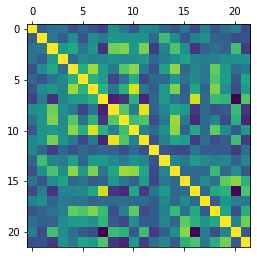

In [18]:
plt.matshow(correlations)

In [19]:
cols = df.columns
cor_df = pd.DataFrame(data = correlations, columns = cols, index = cols)

In [20]:
cor_df

,index,0000000006dd41f6,000000000f4919c9,0000000019fb59c4,00000000342570c2,0000000038bf9618,0000000038d83d41,0000000053c6c2be,00000000675d5200,000000006b087f40,...,0000000096918cfa,00000000a53ed894,00000000aa852af1,00000000afef4555,00000000d747f075,00000000e8a064a4,00000000f1124bca,00000000fb7600be,00000000fdda10fe,00000000fffb8cf0
index,1.000000,-0.071103,0.048906,0.063478,-0.149750,-0.020572,-0.129025,-0.234381,0.236641,0.056937,...,0.172281,-0.012628,-0.136891,0.069058,-0.172617,0.142968,-0.128325,0.017000,0.130519,-0.174135
0000000006dd41f6,-0.071103,1.000000,0.078677,-0.080835,0.221317,-0.129089,0.208989,0.113463,0.271131,0.263827,...,-0.017965,0.527777,0.231596,-0.126013,0.144257,0.242197,-0.038299,-0.052825,-0.163404,-0.144501
000000000f4919c9,0.048906,0.078677,1.000000,0.290826,0.387327,0.070725,0.267803,-0.304580,0.661265,0.707082,...,-0.254564,0.160208,0.574803,0.222110,-0.292592,-0.044147,0.050959,-0.047154,0.538279,-0.265773
0000000019fb59c4,0.063478,-0.080835,0.290826,1.000000,0.004195,0.206412,0.156573,0.174241,0.243787,0.194550,...,-0.014978,0.111450,0.235372,0.358152,0.151405,0.112481,0.144941,0.211890,0.231305,0.256863
00000000342570c2,-0.149750,0.221317,0.387327,0.004195,1.000000,0.433050,0.782018,0.309739,0.094695,0.595211,...,-0.146979,0.340488,0.737385,-0.014876,0.166118,0.071249,0.631238,0.293109,0.025831,0.089454
0000000038bf9618,-0.020572,-0.129089,0.070725,0.206412,0.433050,1.000000,0.450355,0.314906,-0.215909,0.049209,...,-0.012579,-0.008451,0.286968,0.048159,0.195478,0.070128,0.577507,0.327801,-0.106150,0.375795
0000000038d83d41,-0.129025,0.208989,0.267803,0.156573,0.782018,0.450355,1.000000,0.450443,0.061787,0.458476,...,-0.078269,0.300428,0.697256,-0.074813,0.368964,-0.043395,0.703635,0.244018,-0.163498,0.311431
0000000053c6c2be,-0.234381,0.113463,-0.304580,0.174241,0.309739,0.314906,0.450443,1.000000,-0.387625,-0.290243,...,-0.021314,0.286620,0.071195,-0.035542,0.887167,0.009917,0.515667,0.472900,-0.526781,0.586387
00000000675d5200,0.236641,0.271131,0.661265,0.243787,0.094695,-0.215909,0.061787,-0.387625,1.000000,0.595349,...,-0.049303,0.184028,0.369158,0.289906,-0.281365,0.012162,-0.140084,-0.100445,0.515832,-0.279701
000000006b087f40,0.056937,0.263827,0.707082,0.194550,0.595211,0.049209,0.458476,-0.290243,0.595349,1.000000,...,-0.177187,0.097226,0.779879,0.081584,-0.346624,0.013756,0.152051,-0.184862,0.446092,-0.365173


In [21]:
cor_df.to_csv("correlations_14-15.csv")